# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [41]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import scipy.stats as st

# Impor the OpenWeatherMap API key
weather_api_key = "899ff62bbc006d80270ae4415b298d0c"

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city.title())

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 1500


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [23]:
url= "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    #city_url = f"{url}appid={weather_api_key}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    try:
    # Run an API request for each of the cities
        city_weather = requests.get(f"{url}appid={weather_api_key}&q={city}")
        weather_json=city_weather.json()
        city_lat = weather_json['coord']['lat']
        city_lng = weather_json['coord']['lon']
        city_max_temp = weather_json['main']['temp_max']
        city_humidity = weather_json['main']['humidity']
        city_clouds = weather_json['clouds']['all']
        city_wind = weather_json['wind']['speed']
        city_country = weather_json['sys']['country']
        city_date = weather_json['dt']
        city_data.append({"City": city, 
                    "Lat": city_lat, 
                    "Lng": city_lng, 
                    "Max Temp": city_max_temp,
                    "Humidity": city_humidity,
                    "Cloudiness": city_clouds,
                    "Wind Speed": city_wind,
                    "Country": city_country,
                    "Date": city_date})
    except:
            "City not found... skipping..."
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | Ostersund
Processing Record 2 of Set 1 | Katabu
Processing Record 3 of Set 1 | Ushuaia
Processing Record 4 of Set 1 | Papatowai
Processing Record 5 of Set 1 | Dunedin
Processing Record 6 of Set 1 | Uturoa
Processing Record 7 of Set 1 | Georgetown
Processing Record 8 of Set 1 | Port Alfred
Processing Record 9 of Set 1 | Olonkinbyen
Processing Record 10 of Set 1 | Vorgashor
Processing Record 11 of Set 1 | Yuncheng
Processing Record 12 of Set 1 | Waitangi
Processing Record 13 of Set 1 | Saldanha
Processing Record 14 of Set 1 | Waitangi
Processing Record 15 of Set 1 | Margaret River
Processing Record 16 of Set 1 | Katsuura
Processing Record 17 of Set 1 | Port Lincoln
Processing Record 18 of Set 1 | Barcelos
Processing Record 19 of Set 1 | Invercargill
Processing Record 20 of Set 1 | Crane
Processing Record 21 of Set 1 | Isafjordur
Processing Record 22 of Set 1 | Dosso
Processing Record 23 of Set 1 | 

Processing Record 40 of Set 4 | Tarawa
Processing Record 41 of Set 4 | Fort Bragg
Processing Record 42 of Set 4 | Rongelap
Processing Record 43 of Set 4 | Qaqortoq
Processing Record 44 of Set 4 | Goroka
Processing Record 45 of Set 4 | Ayorou
Processing Record 46 of Set 4 | Yellowknife
Processing Record 47 of Set 4 | Bethel
Processing Record 48 of Set 4 | Mejit
Processing Record 49 of Set 4 | Port-Aux-Francais
Processing Record 0 of Set 5 | Selfoss
Processing Record 1 of Set 5 | Aykhal
Processing Record 2 of Set 5 | Margaret River
Processing Record 3 of Set 5 | Dudinka
Processing Record 4 of Set 5 | Remire-Montjoly
Processing Record 5 of Set 5 | Mount Pearl
Processing Record 6 of Set 5 | Waitangi
Processing Record 7 of Set 5 | Xiangtan
Processing Record 8 of Set 5 | Holualoa
Processing Record 9 of Set 5 | Chernyshevskiy
Processing Record 10 of Set 5 | Mahanoro
Processing Record 11 of Set 5 | Bubaque
Processing Record 12 of Set 5 | Alice Springs
Processing Record 13 of Set 5 | Tamanrasse

Processing Record 33 of Set 8 | Mahina
Processing Record 34 of Set 8 | Lihue
Processing Record 35 of Set 8 | Margaret River
Processing Record 36 of Set 8 | Kingston
Processing Record 37 of Set 8 | Nabire
Processing Record 38 of Set 8 | Ribeira Grande
Processing Record 39 of Set 8 | Yellowknife
Processing Record 40 of Set 8 | Ushuaia
Processing Record 41 of Set 8 | Margaret River
Processing Record 42 of Set 8 | Waitangi
Processing Record 43 of Set 8 | Puerto Ayacucho
Processing Record 44 of Set 8 | Port-Aux-Francais
Processing Record 45 of Set 8 | Puerto Baquerizo Moreno
Processing Record 46 of Set 8 | Touros
Processing Record 47 of Set 8 | Port Elizabeth
Processing Record 48 of Set 8 | Albany
Processing Record 49 of Set 8 | Anadyr
Processing Record 0 of Set 9 | St. John'S
Processing Record 1 of Set 9 | Port Elizabeth
Processing Record 2 of Set 9 | Vorgashor
Processing Record 3 of Set 9 | Petropavlovsk-Kamchatsky
Processing Record 4 of Set 9 | Saratamata
Processing Record 5 of Set 9 | A

Processing Record 22 of Set 12 | Wattegama
Processing Record 23 of Set 12 | Tefe
Processing Record 24 of Set 12 | Port-Aux-Francais
Processing Record 25 of Set 12 | Adamstown
Processing Record 26 of Set 12 | Adamstown
Processing Record 27 of Set 12 | Ilulissat
Processing Record 28 of Set 12 | Portland
Processing Record 29 of Set 12 | Keflavik
Processing Record 30 of Set 12 | Praia Da Vitoria
Processing Record 31 of Set 12 | Blackmans Bay
Processing Record 32 of Set 12 | Mukah
Processing Record 33 of Set 12 | Port Mathurin
Processing Record 34 of Set 12 | Kirgiz-Miyaki
Processing Record 35 of Set 12 | Patterson
Processing Record 36 of Set 12 | Thompson
Processing Record 37 of Set 12 | Hawaiian Paradise Park
Processing Record 38 of Set 12 | Haiku-Pauwela
Processing Record 39 of Set 12 | Margaret River
Processing Record 40 of Set 12 | Utrik
Processing Record 41 of Set 12 | Codrington
Processing Record 42 of Set 12 | Yellowknife
Processing Record 43 of Set 12 | Stanley
Processing Record 44

Processing Record 11 of Set 16 | Angaur State
Processing Record 12 of Set 16 | Puerto Ayora
Processing Record 13 of Set 16 | Grytviken
Processing Record 14 of Set 16 | Adamstown
Processing Record 15 of Set 16 | Blackmans Bay
Processing Record 16 of Set 16 | Harper
Processing Record 17 of Set 16 | Chernyshevskiy
Processing Record 18 of Set 16 | Acapulco De Juarez
Processing Record 19 of Set 16 | Waitangi
Processing Record 20 of Set 16 | Popondetta
Processing Record 21 of Set 16 | Edinburgh Of The Seven Seas
Processing Record 22 of Set 16 | San Patricio
Processing Record 23 of Set 16 | Adamstown
Processing Record 24 of Set 16 | Grytviken
Processing Record 25 of Set 16 | Weno
Processing Record 26 of Set 16 | Port-Aux-Francais
Processing Record 27 of Set 16 | Nova Vicosa
Processing Record 28 of Set 16 | Isafjordur
Processing Record 29 of Set 16 | Wailua Homesteads
Processing Record 30 of Set 16 | Mount Vernon
Processing Record 31 of Set 16 | Verkhovazh'Ye
Processing Record 32 of Set 16 | A

Processing Record 3 of Set 20 | Adamstown
Processing Record 4 of Set 20 | Tiksi
Processing Record 5 of Set 20 | Tura
Processing Record 6 of Set 20 | Edinburgh Of The Seven Seas
Processing Record 7 of Set 20 | Las Khorey
Processing Record 8 of Set 20 | Port-Aux-Francais
Processing Record 9 of Set 20 | Dudinka
Processing Record 10 of Set 20 | Kodiak
Processing Record 11 of Set 20 | Grytviken
Processing Record 12 of Set 20 | Sonsorol Village
Processing Record 13 of Set 20 | Ust-Nera
Processing Record 14 of Set 20 | Adamstown
Processing Record 15 of Set 20 | Port-Aux-Francais
Processing Record 16 of Set 20 | College
Processing Record 17 of Set 20 | Mana
Processing Record 18 of Set 20 | Lazaro Cardenas
Processing Record 19 of Set 20 | Weno
Processing Record 20 of Set 20 | Boksitogorsk
Processing Record 21 of Set 20 | Louis Trichardt
Processing Record 22 of Set 20 | Waitangi
Processing Record 23 of Set 20 | Ushuaia
Processing Record 24 of Set 20 | Illizi
Processing Record 25 of Set 20 | Dura

Processing Record 40 of Set 23 | Kodiak
Processing Record 41 of Set 23 | New Norfolk
Processing Record 42 of Set 23 | Grytviken
Processing Record 43 of Set 23 | Port-Aux-Francais
Processing Record 44 of Set 23 | Bredasdorp
Processing Record 45 of Set 23 | Kaoma
Processing Record 46 of Set 23 | Lincheng
Processing Record 47 of Set 23 | Wailua Homesteads
Processing Record 48 of Set 23 | Prudnik
Processing Record 49 of Set 23 | St. John'S
Processing Record 0 of Set 24 | Adamstown
Processing Record 1 of Set 24 | Grytviken
Processing Record 2 of Set 24 | Adamstown
Processing Record 3 of Set 24 | Jamestown
Processing Record 4 of Set 24 | Georgetown
Processing Record 5 of Set 24 | Olonkinbyen
Processing Record 6 of Set 24 | Port Mathurin
Processing Record 7 of Set 24 | Waitangi
Processing Record 8 of Set 24 | Quelimane
Processing Record 9 of Set 24 | Kalmunai
Processing Record 10 of Set 24 | Ivdel'
Processing Record 11 of Set 24 | Waitangi
Processing Record 12 of Set 24 | Kismayo
Processing R

Processing Record 29 of Set 27 | Olonkinbyen
Processing Record 30 of Set 27 | Port Mathurin
Processing Record 31 of Set 27 | Cidreira
Processing Record 32 of Set 27 | Kwali
Processing Record 33 of Set 27 | Sisimiut
Processing Record 34 of Set 27 | Tazovsky
Processing Record 35 of Set 27 | Papatowai
Processing Record 36 of Set 27 | Nabire
Processing Record 37 of Set 27 | Portland
Processing Record 38 of Set 27 | Anadyr
Processing Record 39 of Set 27 | College
Processing Record 40 of Set 27 | Hami
Processing Record 41 of Set 27 | Bilibino
Processing Record 42 of Set 27 | Tazovsky
Processing Record 43 of Set 27 | Invercargill
Processing Record 44 of Set 27 | Lihue
Processing Record 45 of Set 27 | Thompson
Processing Record 46 of Set 27 | Bethel
Processing Record 47 of Set 27 | Saipan
Processing Record 48 of Set 27 | Ilulissat
Processing Record 49 of Set 27 | Port-Aux-Francais
Processing Record 0 of Set 28 | Hithadhoo
Processing Record 1 of Set 28 | Essaouira
Processing Record 2 of Set 28 

In [24]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          1450
Lat           1450
Lng           1450
Max Temp      1450
Humidity      1450
Cloudiness    1450
Wind Speed    1450
Country       1450
Date          1450
dtype: int64

In [25]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ostersund,63.1792,14.6357,287.38,35,100,5.14,SE,1689961767
1,Katabu,-4.9333,122.5167,296.11,90,3,1.88,ID,1689961768
2,Ushuaia,-54.8000,-68.3000,271.96,69,20,7.20,AR,1689961768
3,Papatowai,-46.5619,169.4708,278.58,76,6,6.17,NZ,1689961559
4,Dunedin,-45.8742,170.5036,280.26,77,7,2.68,NZ,1689961492


In [26]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [27]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Ostersund,63.1792,14.6357,287.38,35,100,5.14,SE,1689961767
1,Katabu,-4.9333,122.5167,296.11,90,3,1.88,ID,1689961768
2,Ushuaia,-54.8000,-68.3000,271.96,69,20,7.20,AR,1689961768
3,Papatowai,-46.5619,169.4708,278.58,76,6,6.17,NZ,1689961559
4,Dunedin,-45.8742,170.5036,280.26,77,7,2.68,NZ,1689961492


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

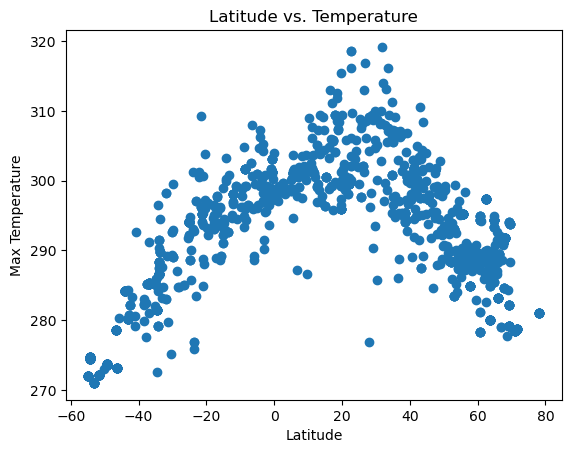

In [28]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("Latitude vs. Temperature")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

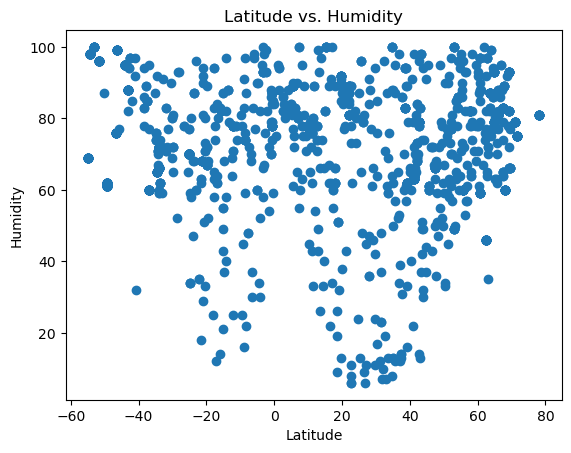

In [33]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

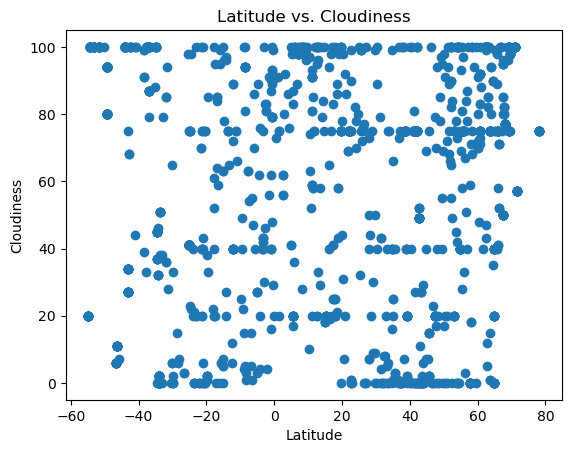

In [35]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(, city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness")
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

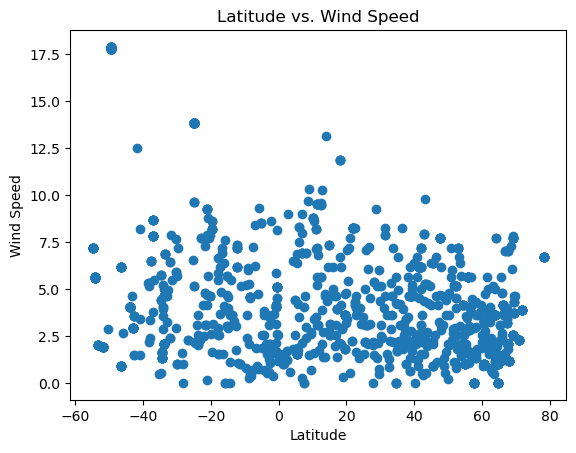

In [36]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots


In [37]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Ostersund,63.1792,14.6357,287.38,35,100,5.14,SE,1689961767
6,Georgetown,5.4112,100.3354,301.12,89,20,1.54,MY,1689961181
8,Olonkinbyen,70.9221,-8.7187,278.44,79,100,2.27,SJ,1689961769
9,Vorgashor,67.5833,63.9500,291.61,79,80,1.83,RU,1689961209
10,Yuncheng,35.0231,110.9928,297.72,62,1,1.75,CN,1689961769


In [38]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,Katabu,-4.9333,122.5167,296.11,90,3,1.88,ID,1689961768
2,Ushuaia,-54.8000,-68.3000,271.96,69,20,7.20,AR,1689961768
3,Papatowai,-46.5619,169.4708,278.58,76,6,6.17,NZ,1689961559
4,Dunedin,-45.8742,170.5036,280.26,77,7,2.68,NZ,1689961492
5,Uturoa,-16.7333,-151.4333,297.82,62,85,6.92,PF,1689961209


###  Temperature vs. Latitude Linear Regression Plot

The correlation between both factors is -0.72.


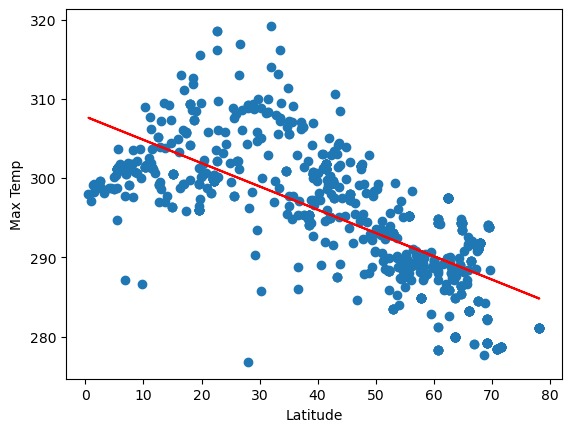

In [44]:
# Linear regression on Northern Hemisphere
correlation = st.pearsonr(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])
print(f"The correlation between both factors is {round(correlation[0],2)}.")
pe_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
pe_fit = pe_slope*(northern_hemi_df["Lat"])+ pe_int
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
plt.plot(northern_hemi_df["Lat"],pe_fit,"-",color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

The correlation between both factors is 0.92.


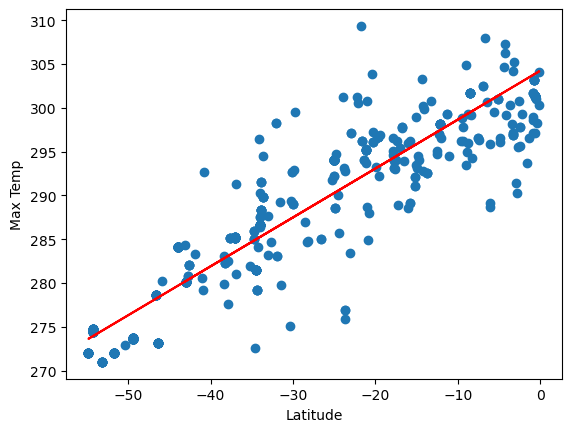

In [45]:
# Linear regression on Southern Hemisphere
correlation = st.pearsonr(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])
print(f"The correlation between both factors is {round(correlation[0],2)}.")
pe_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
pe_fit = pe_slope*(southern_hemi_df["Lat"])+ pe_int
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
plt.plot(southern_hemi_df["Lat"],pe_fit,"-",color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

**Discussion about the linear relationship:** 

There are very strong correlations between temperature and latitude in both the northern (negative correlation) and southern (positive correlation) hemispheres. In the northern hemisphere, latitudes become more positive as you move away from the equator. So the higher the latitude, the further you are from the equator and the colder the maximum temperature. Conversely, in the souther hemisphere, latitudes become more negative as you move away from the equator. So the higher the latitude, the closer you are to the equator and the warmer the maximum temperature.

### Humidity vs. Latitude Linear Regression Plot

The correlation between both factors is 0.08.


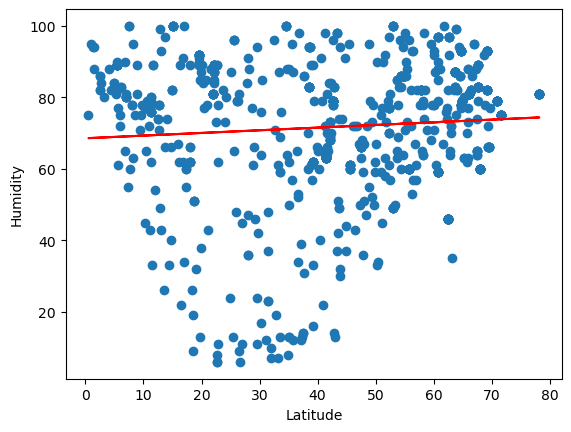

In [46]:
# Northern Hemisphere
correlation = st.pearsonr(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])
print(f"The correlation between both factors is {round(correlation[0],2)}.")
pe_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
pe_fit = pe_slope*(northern_hemi_df["Lat"])+ pe_int
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
plt.plot(northern_hemi_df["Lat"],pe_fit,"-",color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

The correlation between both factors is -0.27.


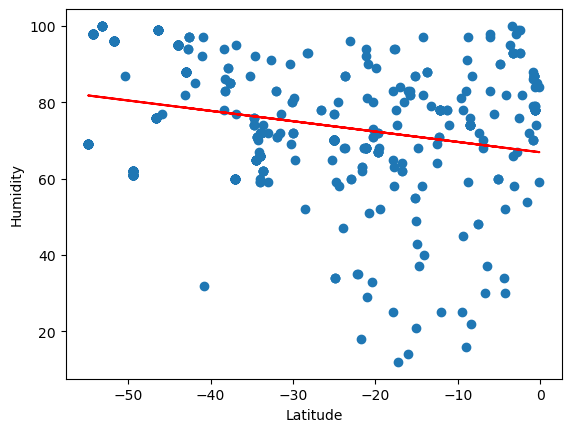

In [47]:
# Southern Hemisphere
correlation = st.pearsonr(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])
print(f"The correlation between both factors is {round(correlation[0],2)}.")
pe_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
pe_fit = pe_slope*(southern_hemi_df["Lat"])+ pe_int
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
plt.plot(southern_hemi_df["Lat"],pe_fit,"-",color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

**Discussion about the linear relationship:** 

The relationship between latitude and humidity is relatively weak in both the northern and southern hemispheres. This is likely because humidity more often depends on climate than temperature (which is strongly correlated to latitude). For example, you could be at a desert on the equator with very dry air and low humidity or you could be in a rainforest in southern Brazil with very high humidity. The relationship between humidity and latitude is stronger in the southern hemisphere, probably because there are more tropical rainforest climates than in the northern hemisphere and these climates are probably somewhat associated with latitude. 

### Cloudiness vs. Latitude Linear Regression Plot

The correlation between both factors is 0.08.


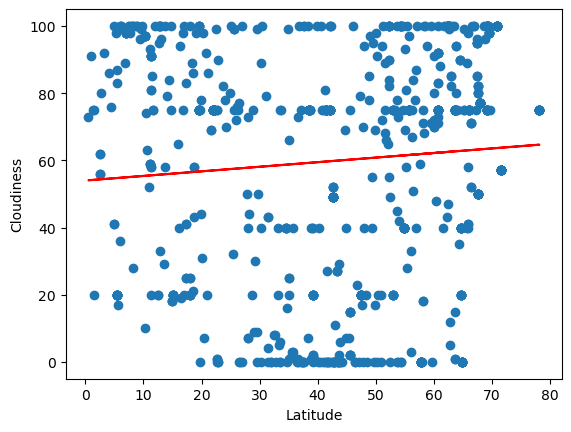

In [48]:
# Northern Hemisphere
correlation = st.pearsonr(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])
print(f"The correlation between both factors is {round(correlation[0],2)}.")
pe_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
pe_fit = pe_slope*(northern_hemi_df["Lat"])+ pe_int
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
plt.plot(northern_hemi_df["Lat"],pe_fit,"-",color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

The correlation between both factors is -0.27.


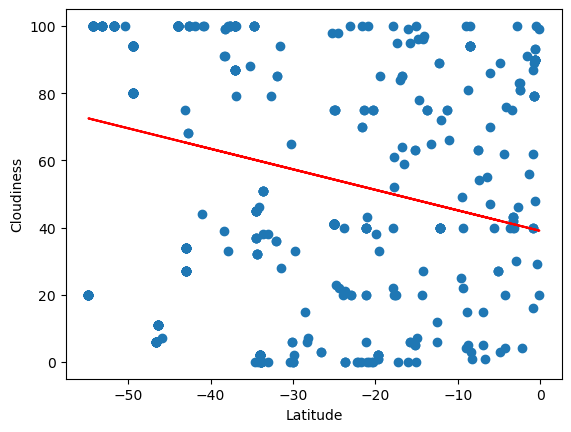

In [49]:
# Southern Hemisphere
correlation = st.pearsonr(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])
print(f"The correlation between both factors is {round(correlation[0],2)}.")
pe_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
pe_fit = pe_slope*(southern_hemi_df["Lat"])+ pe_int
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
plt.plot(southern_hemi_df["Lat"],pe_fit,"-",color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

**Discussion about the linear relationship:** 

The correlation between latitude and cloudiness is very weakly positive in the northern hemisphere, so weak that there's barely any correlation, indicating that latitude does not affect cloudiness. 

In the southern hemisphere, there is a negative moderate correlation between latitude and cloudiness, indicating that the closer to the equator you get, the fewer clouds there are. This is probably because it is winter in the southern hemisphere, and the areas closer to the equator are receiving the most sun, while very southern areas are likely not getting much sun. 

### Wind Speed vs. Latitude Linear Regression Plot

The correlation between both factors is -0.24.


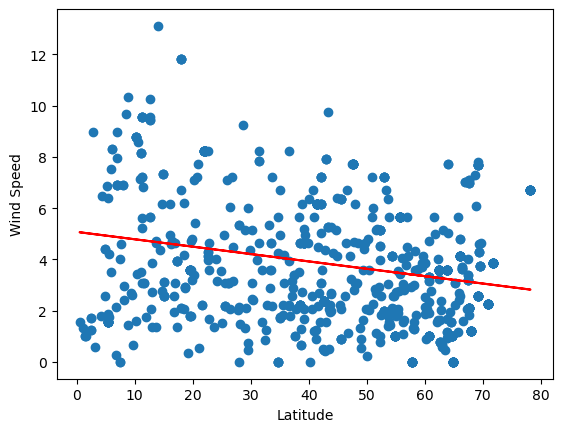

In [50]:
# Northern Hemisphere
correlation = st.pearsonr(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])
print(f"The correlation between both factors is {round(correlation[0],2)}.")
pe_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
pe_fit = pe_slope*(northern_hemi_df["Lat"])+ pe_int
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
plt.plot(northern_hemi_df["Lat"],pe_fit,"-",color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

The correlation between both factors is -0.21.


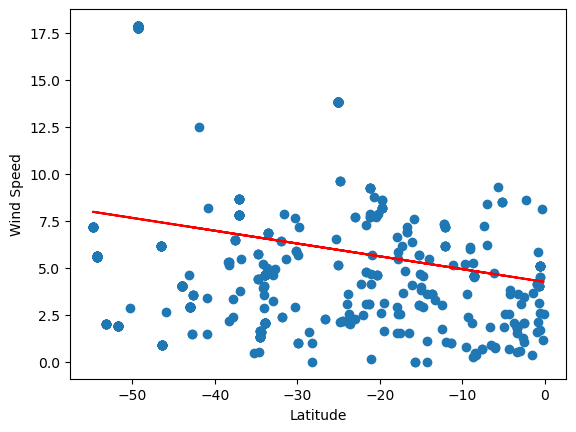

In [51]:
# Southern Hemisphere
correlation = st.pearsonr(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])
print(f"The correlation between both factors is {round(correlation[0],2)}.")
pe_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
pe_fit = pe_slope*(southern_hemi_df["Lat"])+ pe_int
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
plt.plot(southern_hemi_df["Lat"],pe_fit,"-",color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

**Discussion about the linear relationship:**


There are moderate negative correlations between wind speed and latitude in both the northern and southern hemispheres. In the northern hemisphere, latitudes become more positive as you move away from the equator. So the higher the latitude, the further you are from the equator and the lower the wind speeds. Conversely, in the souther hemisphere, latitudes become more negative as you move away from the equator. So the lower the latitude, the lower the wind speeds. This indicates that wind speeds are highest at the equator and lowest at the poles. This could be because atmospheric conditions are different at the poles than between them, because weather patterns move from west to east rather than accumulating at the poles.